# HAND DIGIT RECOGNITION USING MNIST dataset

## 1. Importing 
Importing the Packages.

Downloading MNIST Dataset

Partitioning the data

### Brief Notes of the code below
- Numpy is package that deals with matrics, verctor operation much better than conventional python arrays and list
- Keras Models have MNIST handwritten images and its labels inbuilt and comes part of the package
- Since we use simple ANN Sequential model which uses linear stack of layers.
- We use a dense layer which represents a matrix vector multiplication. 
- np_utils is imported for one-hot encoding of data

** Keras is an open source neural network library written in Python. It is capable of running on top of MXNet, Deeplearning4j, Tensorflow, CNTK or Theano. 

In [3]:
#Importing the necessary Libraries and modules to build our deep neural network
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
(X_train, y_train), (X_test, y_test) = mnist.load_data() # Partition happens here by default

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


11493376/11490434 [==============================] - 52s 5us/step


### 2. Visualizing the data

- In digital imaging, a pixel or picture element is a physical point in a raster image. For a grayscale images, the pixel value is a single number that represents the brightness of the pixel. It is stored as an 8-bit integer giving a range of possible values from 0 to 255. Typically zero is taken to be black, and 255 is taken to be white. Values in between make up the different shades of gray.

<img src='MNIST-input.JPG'>

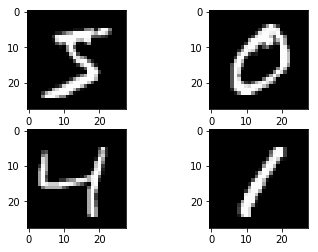

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

## 2. PROCESS THE DATA

In [6]:
# Setting the value the seed. You can set your seed to any value. A particular seed va
seed = 7
numpy.random.seed(seed)

### Flattening the image
- Create a 1D feature vector
<img src='flatten1.jpg'>

In [7]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

### Normalizing the data for better performance of neural network
- Normalization is often performed on data to remove amplitude variation and only focus on the underlying distribution shape. It is thus useful when comparing two data sets (statistical comparison).
<img src='MNIST-Matrix-normalized.png'>

In [8]:
# normalize inputs from 0-255 to 0-1. This is a standard practice 
X_train = X_train / 255
X_test = X_test / 255

### One Hot Encoding
One hot encoding is assigning 1 to working feature and 0’s to other idle features. Mathematically this is very easy to understand: 
[house, car, tooth, car] becomes 
- [[1,0,0,0],
- [0,1,0,1],
- [0,0,1,0]]  

In data science, this is a VERY powerful method for optimising the algorithm for classification problems

In [9]:
# one hot encode outputs. ; 
#For eg. an output of '9' would be one-hot encoded to [0,0,0,0,0,0,0,0,1]
#'8' would be encoded to [0,0,0,0,0,0,0,0,1,0]

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

## 3. MODELLING

This is where we define our Deep Learning Model. It's a small network . But still very powerful.
<img src='ourModel.jpeg'>

### Brief note on the code below
- Start Sequential model
##### Input layer to Hidden layer
- Add a Dense layer and input the feature vector X=28*28 so that weights are initialized
- kernel_initializer initilizes the weights randomly using normal distribution.
- Relu is rectified linear activation function, which does not give any output till value is zero, if the output is greater than zero then it passes the value as it it. 
##### Hidden layer to softmaxed output
- Add a Dense layer initialized with normal kernel with softmax activation function
- Softmax function is often used in the final layer of a neural network-based classifier. It quashes the outputs to probability of each classificants
##### Back propogation and Optimization
- We will use categorical_crossentropy for loss calculation and Adam optimiser as back propogation method to minimise losses
<img src='softmax.png'>


In [10]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu')) #INPUT LAYER
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax')) #1st Layer
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #Compile the model
	return model 

In [11]:
# build the model
model = baseline_model() #initialize the model using the fucntion we defined.
# Fit the model
fit = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 28s - loss: 0.2784 - acc: 0.9209 - val_loss: 0.1415 - val_acc: 0.9573
Epoch 2/10
 - 30s - loss: 0.1117 - acc: 0.9674 - val_loss: 0.0923 - val_acc: 0.9708
Epoch 3/10
 - 30s - loss: 0.0718 - acc: 0.9796 - val_loss: 0.0782 - val_acc: 0.9770
Epoch 4/10
 - 26s - loss: 0.0506 - acc: 0.9856 - val_loss: 0.0743 - val_acc: 0.9770
Epoch 5/10
 - 26s - loss: 0.0377 - acc: 0.9892 - val_loss: 0.0685 - val_acc: 0.9789
Epoch 6/10
 - 28s - loss: 0.0270 - acc: 0.9926 - val_loss: 0.0637 - val_acc: 0.9805
Epoch 7/10
 - 25s - loss: 0.0211 - acc: 0.9946 - val_loss: 0.0618 - val_acc: 0.9806
Epoch 8/10
 - 26s - loss: 0.0141 - acc: 0.9968 - val_loss: 0.0635 - val_acc: 0.9796
Epoch 9/10
 - 27s - loss: 0.0110 - acc: 0.9979 - val_loss: 0.0585 - val_acc: 0.9812
Epoch 10/10
 - 27s - loss: 0.0083 - acc: 0.9984 - val_loss: 0.0582 - val_acc: 0.9818
Accuracy: 98.18%


### Final Evaluation of the Model

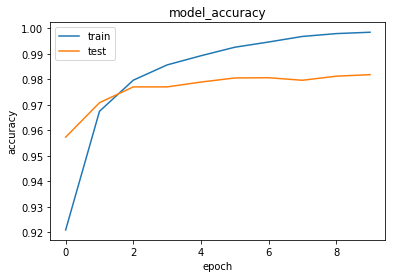

In [12]:
plt.plot(fit.history['acc'])
plt.plot(fit.history['val_acc'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

## PREDICT

Finally let's make some predictions :)

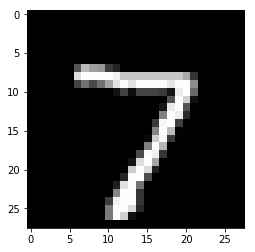

In [13]:
# Let's predict what is the first image of the test set
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_test[0], cmap=plt.get_cmap('gray'))
plt.show()

In [14]:
numpy.argmax(model.predict(X_test[0].reshape(1,784)))

7

Reference: 
1. https://sites.google.com/site/nttrungmtwiki/home/it/data-science---python
2. https://en.wikipedia.org/wiki/Softmax_function
3. http://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/ 
4. https://keras.io
5. https://stackoverflow.com/questions/37428100/confusion-between-binary-crossentropy-and-categorical-crossentropy 
6. https://www.quora.com/Machine-Learning-When-should-I-apply-data-normalization-standardization